Summary Data 2 - data frame for each strategy
==============================================
In this notebook, the data generated from the second generation experiment, are divived in seperate data
sets for each strategy. 

The data sets will be used for statistical analysis.

In [1]:
import pandas as pd

In [2]:
# import after data
binomial = pd.read_hdf("/home/nikoleta/Desktop/binomial_after.h5")

In [3]:
binomial.tail()

,P,R,S,T,average_neighborhood_score,average_score,clustering,connectivity,cooperating_ratio,degree,...,seed,tournament_id,tournament_size,frequency,wins,ratio,cliques,normalized_average_score,num_cliques,median_ranking
2575,1,3,0,5,2.487654,2.166667,1.0,9,0.5,9,...,0,411,10,10,0,0.0,"[[0, 1, 2, 3, 4, 5]]",0.216667,1,6.0
2576,1,3,0,5,2.487654,2.166667,1.0,9,0.5,9,...,1,412,10,10,0,0.0,"[[0, 1, 2, 3, 4, 5]]",0.216667,1,6.0
2577,1,3,0,5,2.487654,2.166667,1.0,9,0.5,9,...,2,413,10,10,0,0.0,"[[0, 1, 2, 3, 4, 5]]",0.216667,1,6.0
2578,1,3,0,5,2.487654,2.166667,1.0,9,0.5,9,...,3,414,10,10,0,0.0,"[[0, 1, 2, 3, 4, 5]]",0.216667,1,6.0
2579,1,3,0,5,2.487654,2.166667,1.0,9,0.5,9,...,4,415,10,10,0,0.0,"[[0, 1, 2, 3, 4, 5]]",0.216667,1,6.0


In [3]:
# median ranking 
median_ranking = binomial.groupby('player_name')['ranking'].median()
ranking_median = pd.DataFrame({'player_name' : list(median_ranking.index), 
                               'median_ranking' : median_ranking.values})
binomial = pd.merge(binomial, ranking_median)

In [4]:
# get list of strategies 
list_strategies = binomial.player_name.unique()
# number of strategies
num_strategies = len(binomial.player_name.unique())

In [5]:
# create data set for each one of the strategies
frames = []
for i in list_strategies :
    frames.append(binomial[binomial.player_name==i])

In [6]:
# fixing index
for i in range(num_strategies):
    frames[i].index = range(len(frames[i]))

In [7]:
len(list_strategies), len(frames)

(43, 43)

Summary Data 3 - Regression Table Winning Ratio
=========================================
A regression model to predict winning ratio for each strategy. Keep coefficients and p value.

In [8]:
# stats libraries
import statsmodels.formula.api as sm
from scipy.stats.stats import pearsonr

import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
frames[0].columns

Index(['P', 'R', 'S', 'T', 'average_neighborhood_score', 'average_score',
       'clustering', 'connectivity', 'cooperating_ratio', 'degree',
       'initial_neighbourhood_size', 'neighborhood_size', 'neighbors',
       'parameter', 'player_index', 'player_name', 'ranking', 'seed',
       'tournament_id', 'tournament_size', 'frequency', 'wins', 'ratio',
       'cliques', 'normalized_average_score', 'num_cliques', 'median_ranking'],
      dtype='object')

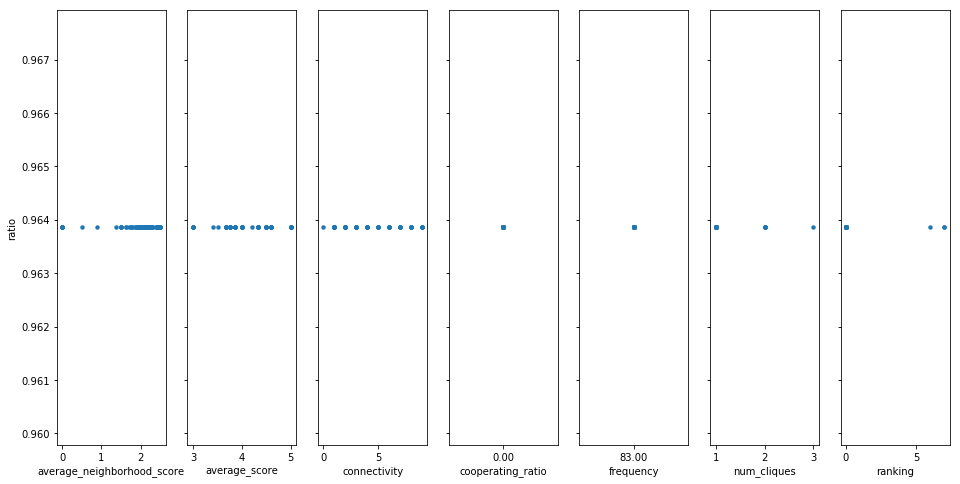

In [10]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 7, sharey=True)
frames[0].plot(kind='scatter', x='average_neighborhood_score', y='ratio', ax=axs[0], figsize=(16, 8))
frames[0].plot(kind='scatter', x='average_score', y='ratio', ax=axs[1])
frames[0].plot(kind='scatter', x='connectivity', y='ratio', ax=axs[2])
frames[0].plot(kind='scatter', x='cooperating_ratio', y='ratio', ax=axs[3])
frames[0].plot(kind='scatter', x='frequency', y='ratio', ax=axs[4])
frames[0].plot(kind='scatter', x='num_cliques', y='ratio', ax=axs[5])
frames[0].plot(kind='scatter', x='ranking', y='ratio', ax=axs[6])

In [11]:
ratio_reg_list = []
for i in range (num_strategies):
    row = []
    model = sm.ols(formula="ratio ~ average_neighborhood_score + average_score + connectivity +  cooperating_ratio + degree + tournament_size + frequency + num_cliques",
                   data=frames[i])
    results = model.fit()
    row.append(frames[i].player_name[0])
    for i in range(len(results.params)):
        row.append(results.params[i])
    for i in range(len(results.pvalues)):
        row.append(results.pvalues[i])
    row.append(results.rsquared)
    ratio_reg_list.append(row)

In [12]:
# fixing columns names
columns = []
columns= ['strategies']
for i in range(len(results.params)):
    columns.append(results.params.index[i])
for i in range(len(results.pvalues)):
    columns.append('p_value_{}'.format(results.pvalues.index[i]))
columns.append('R-square')

In [20]:
df = pd.DataFrame(ratio_reg_list, columns=columns)
df.sort('R-square').dropna().tail()

/home/nikoleta/.local/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,strategies,Intercept,average_neighborhood_score,average_score,connectivity,cooperating_ratio,degree,tournament_size,frequency,num_cliques,p_value_Intercept,p_value_average_neighborhood_score,p_value_average_score,p_value_connectivity,p_value_cooperating_ratio,p_value_degree,p_value_tournament_size,p_value_frequency,p_value_num_cliques,R-square
5,Cycler CCD,0.000009,-3.464026e-17,1.929880e-17,6.776264e-19,9.134319e-06,-8.890458e-18,3.339343e-17,0.001124,3.469447e-18,0.0,0.685688,0.663134,0.969933,0.000000,0.719885,0.018678,0.0,0.965129,-50.544715
13,Davis,0.000017,3.903128e-18,5.854692e-18,8.782038e-18,1.658670e-05,-1.713039e-17,1.409463e-17,0.001244,-6.938894e-18,0.0,0.953394,0.909139,0.751991,0.000000,0.593886,0.367410,0.0,0.694128,-36.993333
3,Champion,0.000001,1.084202e-18,1.084202e-18,-1.924459e-18,-7.199102e-17,2.732528e-18,-5.177065e-18,0.000151,-1.714395e-18,0.0,0.871536,0.872277,0.215863,0.026749,0.186843,0.000018,0.0,0.161661,-25.950355
18,Suspicious Tit For Tat,0.000013,-8.500145e-17,-3.426079e-17,1.799776e-17,1.353084e-16,-3.041187e-17,1.561251e-17,0.000865,-8.131516e-20,0.0,0.002063,0.145200,0.002752,0.235613,0.000394,0.005815,0.0,0.988213,-22.161765
22,Meta Majority,0.000006,-5.637851e-17,-5.551115e-17,-3.957338e-18,2.218278e-16,6.722053e-18,-1.561251e-17,0.000493,-9.622294e-19,0.0,0.165312,0.041775,0.401851,0.008766,0.281071,0.006442,0.0,0.812741,-9.471154


Summary Data 4 - Regression Table Average Score
========================================
A regression model to predict normalizes average score for each strategy. Keep coefficients and p value.

In [102]:
score_reg_list = []
for i in range (num_strategies):
    row = []
    model = sm.ols(formula="normalized_average_score ~ average_neighborhood_score + average_score + connectivity +  cooperating_ratio + degree + tournament_size + frequency + num_cliques",
                   data=frames[i])
    row.append(frames[i].player_name[0])
    for i in range(len(results.params)):
        row.append(results.params[i])
    for i in range(len(results.pvalues)):
        row.append(results.pvalues[i])
    row.append(results.rsquared)
    score_reg_list.append(row)

In [103]:
# fixing columns names
columns = []
columns= ['strategies']
for i in range(len(results.params)):
    columns.append(results.params.index[i])
for i in range(len(results.pvalues)):
    columns.append('p_value_{}'.format(results.pvalues.index[i]))
columns.append('R-square')

In [104]:
df = pd.DataFrame(score_reg_list, columns=columns)